# LOAN APPROVAL PREDICTION 

## Objective

To build a machine learning model that can predict whether a loan will be approved or not, using
various applicant and loan-related features. The goal is to help financial institutions make data-driven
lending decisions.

#### Financial institutions often face significant challenges in automating loan approval processes due to:

Poor data quality

Human entry errors

Unstructured fields

Biased or imbalanced data

Lack of explainability in automated decisions

This project simulates a realistic environment by working on intentionally messy synthetic data, requiring deep preprocessing and feature engineering before model training.

## About Dataset

The sample dataset includes various details, such as:

#### Categorical Columns: 
Gender (Male, Female) | 
Married (Yes, No) | 
Education (Graduate, Not Graduate) | 
Self_Employed (Yes, No) | 
Property_Area (Urban, Semiurban, Rural) | 
Loan_Status (Y, N) — also called the target variable

#### Numerical Columns:
ApplicantIncome (e.g., 50000) | 
LoanAmount (e.g., 200000) | 
Loan_Amount_Term (e.g., 360 months) | 
Credit_Score (e.g., 720) | 
Age (e.g., 32)


## Importing necessary libraries

In [12]:
import sys
print(sys.executable)

C:\Users\admin\.conda\envs\loanenv\python.exe


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [14]:
loan_data = pd.read_csv("loan_data_1.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP000,Male,Yes,0,Graduate,No,1777,4,128.752030,360.0,1.0,Urban,Y
1,LP001,Female,Yes,1,Graduate,No,3561,455,149.428829,360.0,1.0,Urban,N
2,LP002,Female,Yes,0,Graduate,Yes,5163,5598,114.227296,360.0,1.0,Rural,N
3,LP003,Female,Yes,1,Graduate,No,24252,1172,423.684094,NaN,1.0,Rural,Y
4,LP004,Male,Yes,0,Not Graduate,No,5943,260,16.492337,360.0,1.0,Rural,Y


## Descriptive statistics

In [15]:
loan_data.shape

(100000, 13)

Total no. of rows = 100000,
Total no. of columns = 13

In [16]:
#summary of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Loan_ID            100000 non-null  object 
 1   Gender             96114 non-null   object 
 2   Married            94944 non-null   object 
 3   Dependents         94899 non-null   object 
 4   Education          100000 non-null  object 
 5   Self_Employed      95016 non-null   object 
 6   ApplicantIncome    100000 non-null  int64  
 7   CoapplicantIncome  100000 non-null  int64  
 8   LoanAmount         99000 non-null   float64
 9   Loan_Amount_Term   94966 non-null   float64
 10  Credit_History     95085 non-null   float64
 11  Property_Area      100000 non-null  object 
 12  Loan_Status        100000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 9.9+ MB


In [17]:
#Descriptive summary of dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,100000.000000,100000.000000,99000.000000,94966.000000,95085.000000
mean,5049.001060,2016.891420,150.514445,316.054167,0.864153
std,6136.777333,2306.445652,151.340164,77.303896,0.342628
min,-26190.000000,-12871.000000,0.000076,120.000000,0.000000
25%,1421.000000,570.000000,43.122923,240.000000,1.000000
50%,3434.000000,1376.000000,103.761589,360.000000,1.000000
75%,6916.000000,2778.000000,208.611166,360.000000,1.000000
max,327670.000000,124380.000000,1952.782620,360.000000,1.000000


In [18]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
#checking for null values
loan_data.isnull().sum()

Loan_ID                 0
Gender               3886
Married              5056
Dependents           5101
Education               0
Self_Employed        4984
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount           1000
Loan_Amount_Term     5034
Credit_History       4915
Property_Area           0
Loan_Status             0
dtype: int64

In [20]:
loan_data_cleaned = loan_data.copy(deep = True)

In [21]:
loan_data_cleaned = loan_data_cleaned.sample(n=10000, random_state=42).reset_index(drop=True)

# Univariate Analysis 

<Axes: xlabel='Gender', ylabel='Count'>

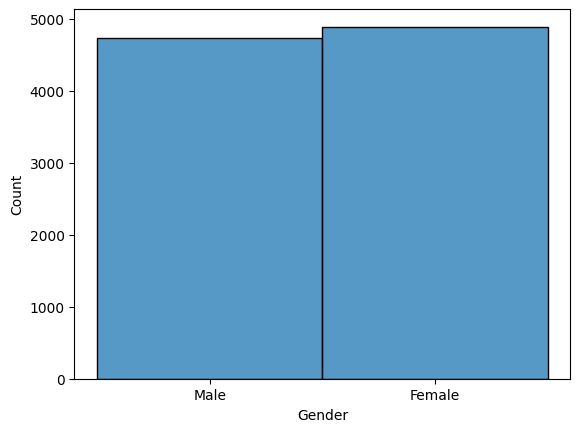

In [22]:
sns.histplot(loan_data_cleaned['Gender'])

Count of Male applicants is similar to Female

<Axes: xlabel='Loan_Status', ylabel='Count'>

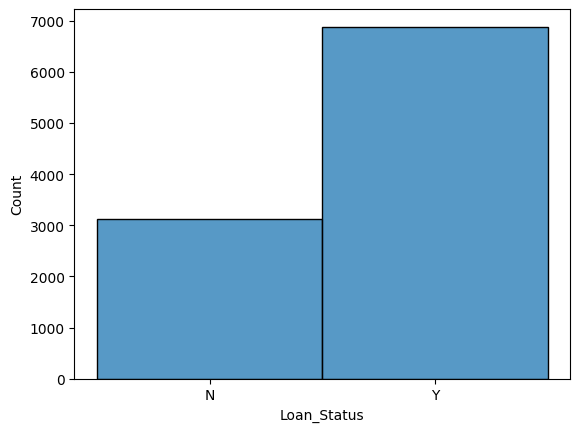

In [23]:
sns.histplot(loan_data_cleaned['Loan_Status'])

<Axes: xlabel='Married', ylabel='Count'>

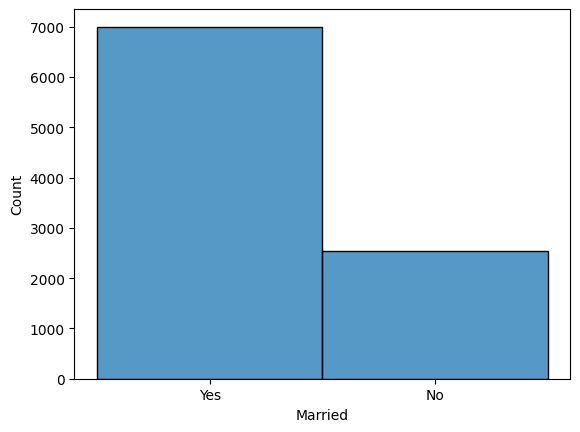

In [24]:
sns.histplot(loan_data_cleaned['Married'])

Count of Married applicant is more than Non-married

<Axes: xlabel='Education', ylabel='Count'>

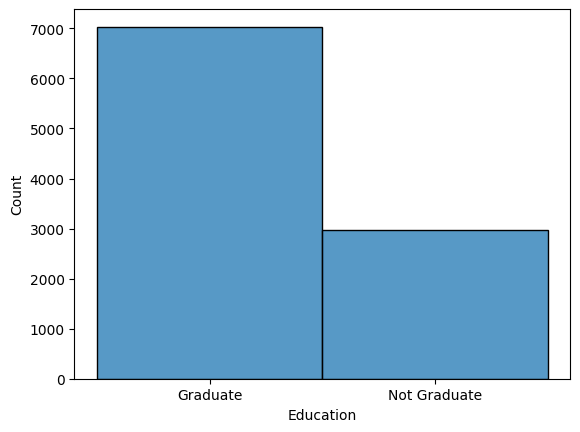

In [25]:
sns.histplot(loan_data_cleaned['Education'])

Count of graduate is more than non-Graduate

<Axes: xlabel='Self_Employed', ylabel='Count'>

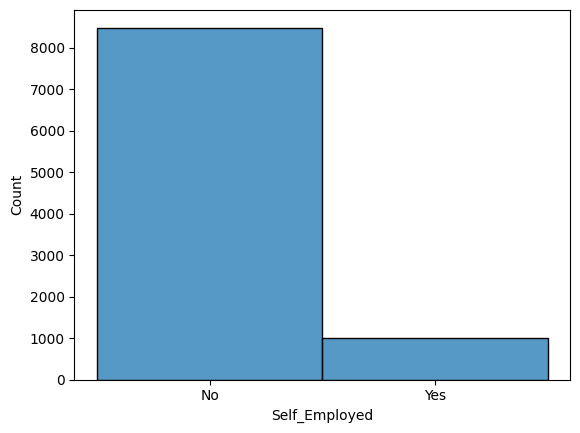

In [26]:
sns.histplot(loan_data_cleaned['Self_Employed'])

Count of Self employed is less than non-self employed

<Axes: xlabel='Property_Area', ylabel='Count'>

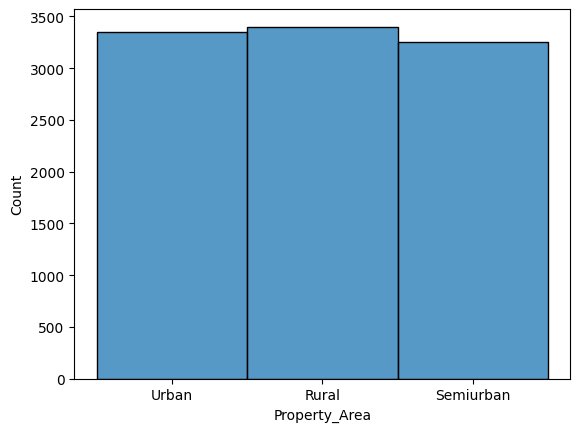

In [27]:
sns.histplot(loan_data_cleaned['Property_Area'])

<Axes: xlabel='Credit_History', ylabel='Count'>

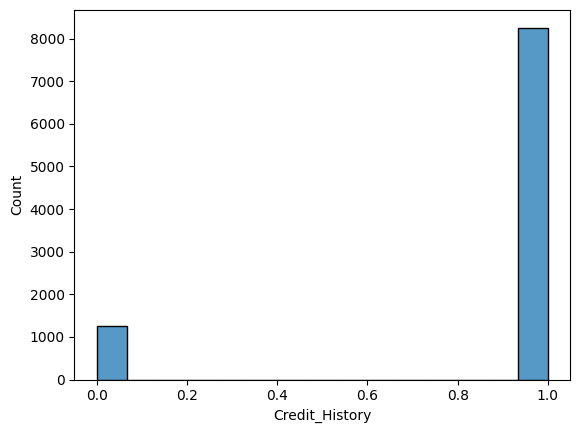

In [28]:
sns.histplot(loan_data_cleaned['Credit_History'])

Credit History is present for many applicants

<Axes: xlabel='Dependents', ylabel='Count'>

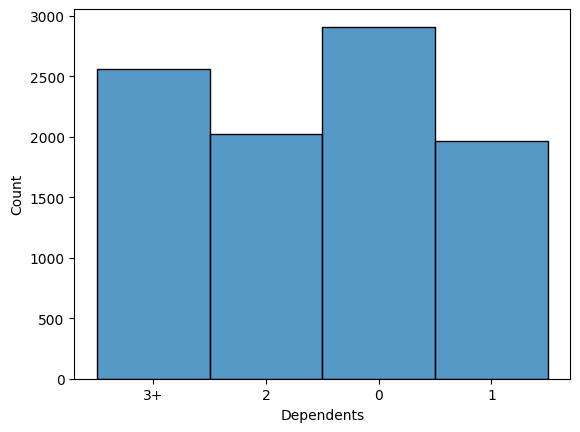

In [29]:
sns.histplot(loan_data_cleaned['Dependents'])

The count of applicants with several dependents=0 is maximum

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

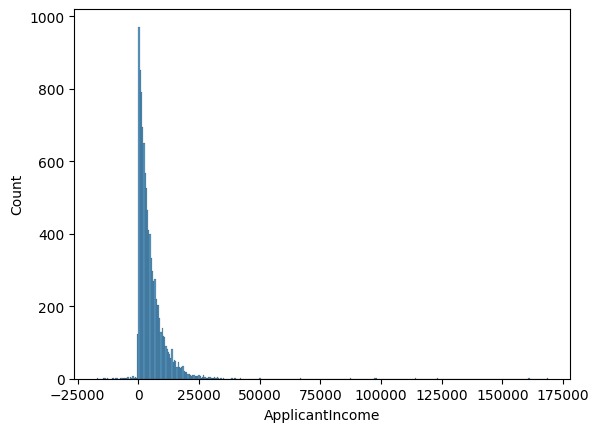

In [30]:
sns.histplot(loan_data_cleaned['ApplicantIncome'])

In [31]:
loan_data_cleaned['ApplicantIncome'].mean()

np.float64(4966.4157)

# Converting type

In [32]:
loan_data_cleaned['Dependents'].unique()

array(['3+', '2', '0', '1', nan], dtype=object)

In [33]:
# Convert types if needed (e.g., object to string)
loan_data_cleaned['Dependents'].replace('3+', 3, inplace=True)
loan_data_cleaned['Dependents'] = loan_data_cleaned['Dependents'].astype(float)

# Fixing negative income

In [34]:
loan_data_cleaned[loan_data_cleaned['ApplicantIncome'] < 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP0050074,Male,Yes,1.0,Graduate,No,-1828,1123,114.099698,180.0,1.0,Rural,Y
327,LP0086000,Female,Yes,0.0,Not Graduate,No,-10951,286,12.140532,360.0,1.0,Rural,Y
390,LP0011712,Female,No,3.0,Not Graduate,No,-4551,196,98.498783,240.0,1.0,Urban,Y
408,LP0060770,Female,Yes,1.0,Not Graduate,No,-2168,3243,48.727806,360.0,1.0,Urban,Y
1186,LP0072811,Female,No,0.0,Graduate,NaN,-4022,136,211.768392,360.0,1.0,Semiurban,Y
1198,LP0098710,Male,Yes,2.0,Graduate,No,-2267,1146,318.240078,360.0,1.0,Urban,Y
1397,LP0059390,Male,Yes,NaN,Graduate,No,-2418,2809,87.529920,180.0,0.0,Rural,Y
1566,LP0014762,Male,Yes,2.0,Graduate,No,-10064,3564,203.149693,360.0,1.0,Semiurban,Y
1585,LP0082327,Female,Yes,1.0,Graduate,No,-3397,1838,6.037359,360.0,1.0,Urban,Y
1621,LP0069019,Female,No,0.0,Not Graduate,No,-7414,3463,58.708056,120.0,1.0,Rural,Y


In [35]:
loan_data_cleaned[loan_data_cleaned['CoapplicantIncome'] < 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
429,LP001230,Female,Yes,2.0,Graduate,No,1212,-2725,67.486343,360.0,1.0,Urban,Y
868,LP00928,Female,No,1.0,Graduate,No,31757,-1476,23.568957,360.0,1.0,Rural,N
962,LP0019837,Male,Yes,1.0,Not Graduate,No,364,-1889,123.469126,180.0,1.0,Semiurban,N
1250,LP0035741,Female,Yes,2.0,Not Graduate,Yes,2169,-142,310.717428,360.0,1.0,Urban,Y
1487,LP0093158,Male,Yes,3.0,Not Graduate,No,1761,-3819,61.905790,180.0,1.0,Rural,Y
1567,LP0022977,Male,Yes,2.0,Graduate,No,3312,-1515,34.081378,360.0,1.0,Rural,N
1607,LP0097139,Female,No,0.0,Graduate,No,1310,-556,144.505221,360.0,0.0,Urban,N
1852,LP0053623,Female,Yes,0.0,Graduate,Yes,16731,-1912,104.144967,360.0,1.0,Rural,Y
2122,LP0020228,Female,Yes,3.0,Not Graduate,No,3656,-1548,270.522863,360.0,0.0,Semiurban,Y
2190,LP0085375,Female,Yes,0.0,Not Graduate,No,6734,-7013,84.861586,360.0,1.0,Urban,Y


In [36]:
# Fix negative incomes
loan_data_cleaned['ApplicantIncome'] = loan_data_cleaned['ApplicantIncome'].apply(lambda x: np.nan if x < 0 else x)
loan_data_cleaned['CoapplicantIncome'] = loan_data_cleaned['CoapplicantIncome'].apply(lambda x: np.nan if x < 0 else x)

# Dealing with null values

In [37]:
loan_data_cleaned.isnull().sum()

Loan_ID                0
Gender               372
Married              448
Dependents           544
Education              0
Self_Employed        503
ApplicantIncome       54
CoapplicantIncome     51
LoanAmount            97
Loan_Amount_Term     482
Credit_History       489
Property_Area          0
Loan_Status            0
dtype: int64

In [38]:
#GENDER
value_to_fill = loan_data_cleaned['Gender'].mode()[0]
loan_data_cleaned['Gender'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3.0,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,NaN,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,NaN,0.0,Urban,Y
3,LP0076699,Female,Yes,3.0,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y


In [39]:
#GENDER
value_to_fill = loan_data_cleaned['Married'].mode()[0]
loan_data_cleaned['Married'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3.0,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,NaN,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,NaN,0.0,Urban,Y
3,LP0076699,Female,Yes,3.0,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y


In [40]:
#DEPENDENTS
value_to_fill = loan_data_cleaned['Dependents'].mode()[0]
loan_data_cleaned['Dependents'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3.0,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,NaN,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,NaN,0.0,Urban,Y
3,LP0076699,Female,Yes,3.0,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y


In [41]:
#SELF EMPLOYED
value_to_fill = loan_data_cleaned['Self_Employed'].mode()[0]
loan_data_cleaned['Self_Employed'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3.0,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,NaN,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,NaN,0.0,Urban,Y
3,LP0076699,Female,Yes,3.0,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y


In [42]:
loan_data_cleaned['Loan_Amount_Term'].unique()

array([360.,  nan, 240., 180., 120.])

In [43]:
# Its only proper to fill null values of loan amount term with mode
value_to_fill = loan_data_cleaned['Loan_Amount_Term'].mode()[0]
loan_data_cleaned['Loan_Amount_Term'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3.0,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,360.0,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,360.0,0.0,Urban,Y
3,LP0076699,Female,Yes,3.0,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y


In [44]:
#CREDIT HISTORY
value_to_fill = loan_data_cleaned['Credit_History'].mode()[0]
loan_data_cleaned['Credit_History'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3.0,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,360.0,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,360.0,0.0,Urban,Y
3,LP0076699,Female,Yes,3.0,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y


In [45]:
loan_data_cleaned['LoanAmount'].median()

np.float64(102.70055626774756)

In [46]:
loan_data_cleaned['LoanAmount'].mean()

np.float64(148.9387221616273)

### Since loan amount gave us skewed result we will fill null values with median

In [47]:
#LOAN AMOUNT
value_to_fill = loan_data_cleaned['LoanAmount'].median()
loan_data_cleaned['LoanAmount'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3.0,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,360.0,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,360.0,0.0,Urban,Y
3,LP0076699,Female,Yes,3.0,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

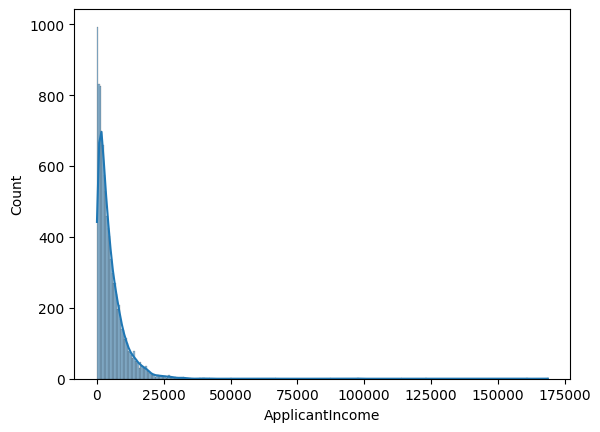

In [48]:
sns.histplot(loan_data_cleaned['ApplicantIncome'], kde=True)

In [49]:
loan_data_cleaned['ApplicantIncome'].skew()

np.float64(7.611452492110283)

Skewness > 1 or < -1 → highly skewed → use median.

Skewness between -0.5 and 0.5 → fairly symmetric → mean is okay.

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

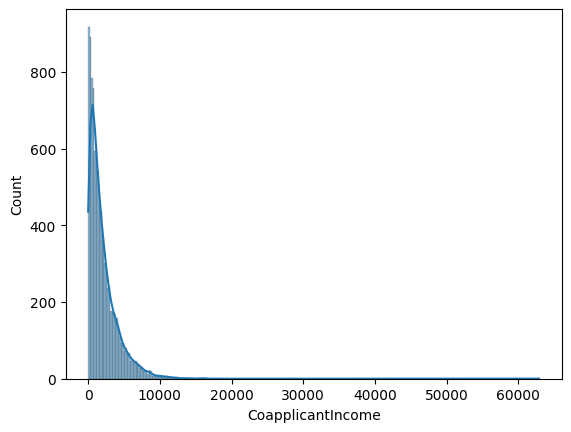

In [50]:
sns.histplot(loan_data_cleaned['CoapplicantIncome'], kde=True)

In [51]:
loan_data_cleaned['CoapplicantIncome'].skew()

np.float64(5.241067351942107)

In [52]:
value_to_fill = loan_data_cleaned['ApplicantIncome'].median()
loan_data_cleaned['ApplicantIncome'].fillna(value_to_fill,inplace=True)


In [53]:
value_to_fill = loan_data_cleaned['CoapplicantIncome'].median()
loan_data_cleaned['CoapplicantIncome'].fillna(value_to_fill,inplace=True)


In [54]:
loan_data_cleaned.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
loan_data_cleaned.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:
loan_data_cleaned['Dependents'] = loan_data_cleaned['Dependents'].astype(str)
loan_data_cleaned['Dependents'] = loan_data_cleaned['Dependents'].replace({'3.0': '3+'})

In [57]:
loan_data_cleaned['Dependents'].unique()

array(['3+', '2.0', '0.0', '1.0'], dtype=object)

In [58]:
loan_data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
cat_cols = loan_data_cleaned.select_dtypes(include='object').columns
num_cols = loan_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

In [60]:
for col in num_cols:
    loan_data_cleaned[col].fillna(loan_data_cleaned[col].median(), inplace=True)

In [61]:
for col in cat_cols:
    loan_data_cleaned[col].fillna(loan_data_cleaned[col].mode()[0], inplace=True)

# Outliers

## Applicant Income

### Relation between Applicant Income and Loan status

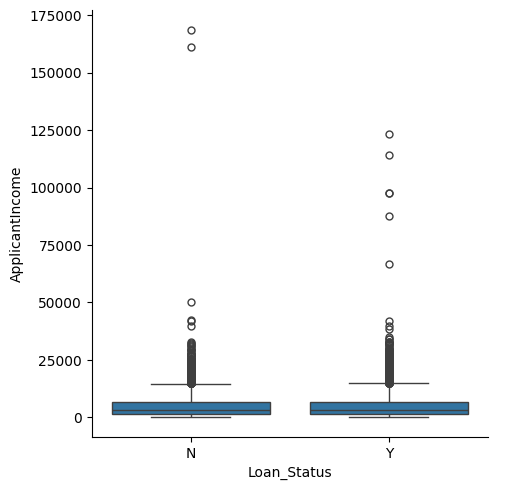

In [62]:
sns.catplot(data=loan_data_cleaned, y='ApplicantIncome', x='Loan_Status', kind ='box')

In [63]:
q1, q3 = np.percentile(loan_data_cleaned['ApplicantIncome'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['ApplicantIncome'] < lower_bound) | (loan_data_cleaned['ApplicantIncome'] > upper_bound)]
outliers

-6686.0
14898.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
6,LP0084004,Female,No,1.0,Graduate,No,19310.0,2915.0,112.446488,240.0,1.0,Semiurban,N
11,LP0042141,Male,Yes,0.0,Graduate,No,20317.0,333.0,221.826806,360.0,1.0,Semiurban,N
16,LP00149,Male,Yes,2.0,Graduate,No,19415.0,49.0,458.748591,360.0,1.0,Urban,Y
30,LP0079022,Female,Yes,3+,Not Graduate,No,16854.0,634.0,88.851217,120.0,1.0,Rural,Y
32,LP0016821,Female,Yes,0.0,Graduate,No,18407.0,374.0,136.260144,120.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,LP0031284,Female,Yes,1.0,Graduate,No,30751.0,2224.0,569.507380,180.0,1.0,Rural,N
9943,LP0038525,Male,Yes,1.0,Graduate,No,19720.0,673.0,73.961683,360.0,1.0,Urban,Y
9953,LP0053962,Female,Yes,1.0,Graduate,Yes,14960.0,1939.0,2.082188,360.0,1.0,Semiurban,Y
9955,LP00106,Male,Yes,3+,Graduate,No,26444.0,923.0,295.718811,360.0,1.0,Rural,Y


## Removing outliers

In [64]:
#taking 15000 as threshold
index_drop=loan_data_cleaned[loan_data_cleaned['ApplicantIncome'] > 15000].index
loan_data_cleaned=loan_data_cleaned.drop(index_drop).reset_index(drop=True)
loan_data_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3+,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,360.0,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,360.0,0.0,Urban,Y
3,LP0076699,Female,Yes,3+,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,LP005002,Female,Yes,0.0,Graduate,No,269.0,1981.0,255.904269,240.0,1.0,Rural,N
9494,LP0030151,Male,Yes,2.0,Graduate,No,11047.0,730.0,278.925796,360.0,1.0,Rural,Y
9495,LP0093194,Female,Yes,3+,Graduate,No,1285.0,116.0,110.347530,360.0,1.0,Rural,Y
9496,LP0073199,Female,Yes,1.0,Graduate,No,6416.0,263.0,328.299350,360.0,1.0,Semiurban,Y


## Coapplicant Income

### Relation between Coapplicant Income and Loan status

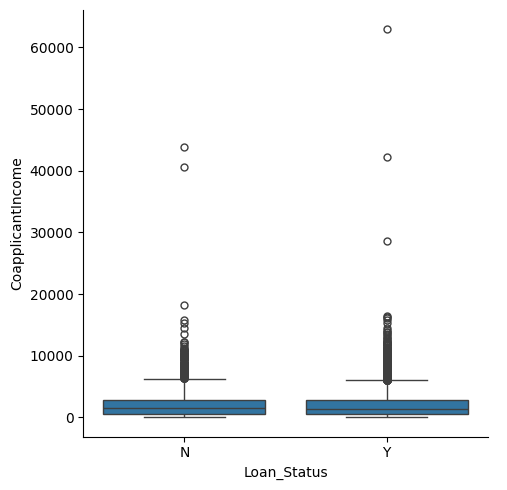

In [65]:
sns.catplot(data=loan_data_cleaned, y='CoapplicantIncome', x='Loan_Status', kind ='box')

In [66]:
q1, q3 = np.percentile(loan_data_cleaned['CoapplicantIncome'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['CoapplicantIncome'] < lower_bound) | (loan_data_cleaned['CoapplicantIncome'] > upper_bound)]
outliers

-2727.0
6121.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP0016638,Male,Yes,3+,Graduate,No,1423.0,8146.0,187.189798,180.0,1.0,Urban,Y
35,LP0089577,Female,Yes,2.0,Graduate,No,817.0,10453.0,12.978027,180.0,1.0,Rural,N
41,LP0075498,Female,Yes,1.0,Graduate,No,2364.0,6432.0,20.332749,360.0,1.0,Rural,Y
62,LP0028177,Male,Yes,0.0,Graduate,Yes,694.0,7194.0,277.974391,360.0,1.0,Urban,N
67,LP0014531,Female,Yes,2.0,Not Graduate,No,3184.0,6790.0,40.504907,360.0,1.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9464,LP0036430,Female,Yes,1.0,Graduate,No,7222.0,6982.0,645.528548,240.0,1.0,Urban,N
9468,LP0041267,Female,Yes,1.0,Graduate,No,9211.0,6427.0,52.157460,360.0,1.0,Rural,Y
9470,LP0030500,Female,Yes,0.0,Graduate,No,4777.0,7270.0,342.551005,180.0,0.0,Urban,Y
9477,LP0024545,Female,No,1.0,Not Graduate,No,5716.0,7956.0,273.811514,180.0,1.0,Urban,Y


## Removing outliers

In [67]:
#taking 6,100 as threshold
index_drop=loan_data_cleaned[loan_data_cleaned['CoapplicantIncome'] > 6100].index
loan_data_cleaned=loan_data_cleaned.drop(index_drop).reset_index(drop=True)
loan_data_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0075721,Male,Yes,3+,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N
1,LP0080184,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,360.0,1.0,Urban,Y
2,LP0019864,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,360.0,0.0,Urban,Y
3,LP0076699,Female,Yes,3+,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N
4,LP0092991,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,LP005002,Female,Yes,0.0,Graduate,No,269.0,1981.0,255.904269,240.0,1.0,Rural,N
8986,LP0030151,Male,Yes,2.0,Graduate,No,11047.0,730.0,278.925796,360.0,1.0,Rural,Y
8987,LP0093194,Female,Yes,3+,Graduate,No,1285.0,116.0,110.347530,360.0,1.0,Rural,Y
8988,LP0073199,Female,Yes,1.0,Graduate,No,6416.0,263.0,328.299350,360.0,1.0,Semiurban,Y


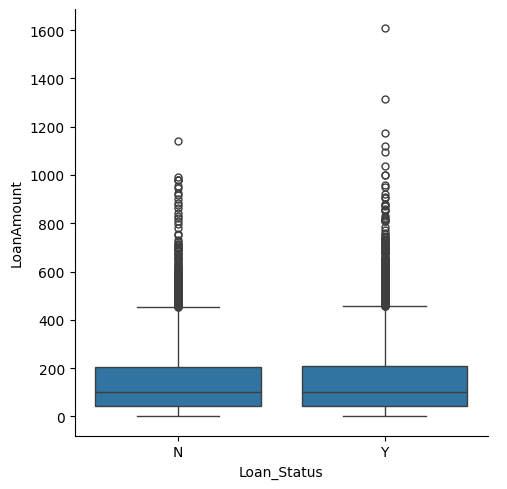

In [68]:
sns.catplot(data=loan_data_cleaned, y='LoanAmount', x='Loan_Status', kind ='box')

In [69]:
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['LoanAmount'] < lower_bound) | (loan_data_cleaned['LoanAmount'] > upper_bound)]
outliers

-2727.0
6121.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


<Axes: xlabel='Credit_History', ylabel='Count'>

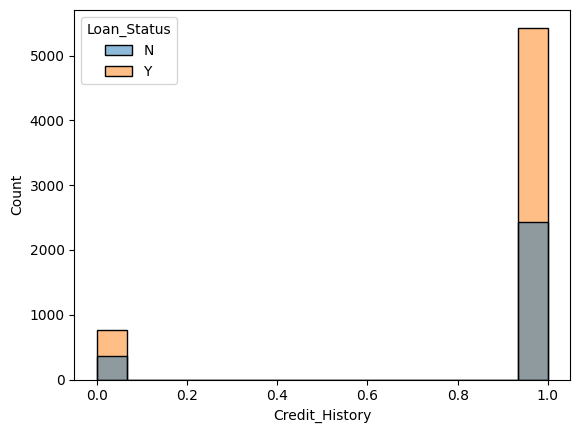

In [70]:
sns.histplot(data=loan_data_cleaned, x="Credit_History", hue="Loan_Status")

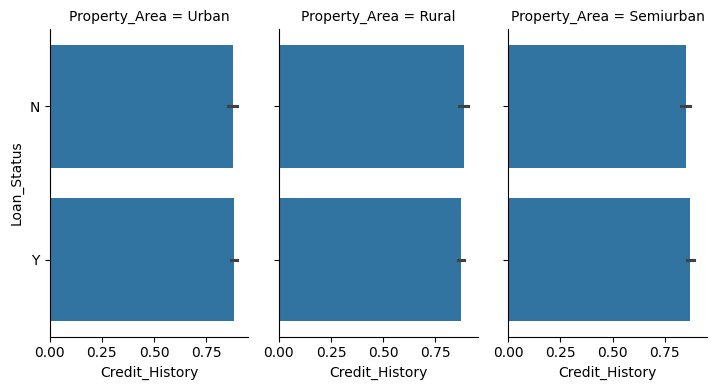

In [71]:
sns.catplot(data=loan_data_cleaned, x="Credit_History", y="Loan_Status", col="Property_Area",kind="bar", height=4, aspect=.6,)

# Data preparation

# Feature Engineering

In [72]:
loan_data_cleaned.drop('Loan_ID',axis=1, inplace=True)

In [73]:
loan_data_cleaned['TotalIncome'] = loan_data_cleaned['ApplicantIncome'] + loan_data_cleaned['CoapplicantIncome']
loan_data_cleaned['LoanAmount_log'] = np.log1p(loan_data_cleaned['LoanAmount'])
loan_data_cleaned['EMI'] = loan_data_cleaned['LoanAmount'] / loan_data_cleaned['Loan_Amount_Term']
loan_data_cleaned['Balance_Income'] = loan_data_cleaned['TotalIncome'] - (loan_data_cleaned['EMI']*1000)  # assuming EMI in thousands

## Converting categorical columns to numerical

## One hot encoding

In [74]:
loan_data_encoded_ = loan_data_cleaned.copy(deep = True)
loan_data_encoded_.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,Male,Yes,3+,Graduate,No,4391.0,40.0,42.691843,360.0,1.0,Urban,N,4431.0,3.777161,0.118588,4312.411547
1,Male,Yes,2.0,Graduate,Yes,361.0,1671.0,87.336038,360.0,1.0,Urban,Y,2032.0,4.481148,0.242600,1789.399895
2,Female,No,0.0,Not Graduate,No,1351.0,4075.0,45.402814,360.0,0.0,Urban,Y,5426.0,3.837360,0.126119,5299.881073
3,Female,Yes,3+,Graduate,No,2015.0,2342.0,142.390986,360.0,1.0,Rural,N,4357.0,4.965575,0.395531,3961.469483
4,Male,Yes,0.0,Graduate,No,3552.0,1254.0,69.226787,240.0,1.0,Rural,Y,4806.0,4.251730,0.288445,4517.555054


In [75]:
# Importing onehotencoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [76]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             8990 non-null   object 
 1   Married            8990 non-null   object 
 2   Dependents         8990 non-null   object 
 3   Education          8990 non-null   object 
 4   Self_Employed      8990 non-null   object 
 5   ApplicantIncome    8990 non-null   float64
 6   CoapplicantIncome  8990 non-null   float64
 7   LoanAmount         8990 non-null   float64
 8   Loan_Amount_Term   8990 non-null   float64
 9   Credit_History     8990 non-null   float64
 10  Property_Area      8990 non-null   object 
 11  Loan_Status        8990 non-null   object 
 12  TotalIncome        8990 non-null   float64
 13  LoanAmount_log     8990 non-null   float64
 14  EMI                8990 non-null   float64
 15  Balance_Income     8990 non-null   float64
dtypes: float64(9), object(7)

In [77]:
#converting categorical variables to numerical
encoded_loan_data=encoder.fit_transform(loan_data_encoded_[['Gender','Married','Education','Dependents','Self_Employed','Property_Area']]).toarray()
encoded_loan_dataset=pd.DataFrame(encoded_loan_data,columns=encoder.get_feature_names_out())
encoded_loan_dataset

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8986,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8987,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8988,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [78]:
#merging dataframes
loan_data_encoded_=pd.concat([encoded_loan_dataset,loan_data_encoded_,],axis=1)
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,40.0,42.691843,360.0,1.0,Urban,N,4431.0,3.777161,0.118588,4312.411547
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1671.0,87.336038,360.0,1.0,Urban,Y,2032.0,4.481148,0.242600,1789.399895
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4075.0,45.402814,360.0,0.0,Urban,Y,5426.0,3.837360,0.126119,5299.881073
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2342.0,142.390986,360.0,1.0,Rural,N,4357.0,4.965575,0.395531,3961.469483
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1254.0,69.226787,240.0,1.0,Rural,Y,4806.0,4.251730,0.288445,4517.555054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1981.0,255.904269,240.0,1.0,Rural,N,2250.0,5.548704,1.066268,1183.732212
8986,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,730.0,278.925796,360.0,1.0,Rural,Y,11777.0,5.634525,0.774794,11002.206124
8987,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,116.0,110.347530,360.0,1.0,Rural,Y,1401.0,4.712656,0.306521,1094.479084
8988,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,263.0,328.299350,360.0,1.0,Semiurban,Y,6679.0,5.796967,0.911943,5767.057360


In [79]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            8990 non-null   float64
 1   Gender_Male              8990 non-null   float64
 2   Married_No               8990 non-null   float64
 3   Married_Yes              8990 non-null   float64
 4   Education_Graduate       8990 non-null   float64
 5   Education_Not Graduate   8990 non-null   float64
 6   Dependents_0.0           8990 non-null   float64
 7   Dependents_1.0           8990 non-null   float64
 8   Dependents_2.0           8990 non-null   float64
 9   Dependents_3+            8990 non-null   float64
 10  Self_Employed_No         8990 non-null   float64
 11  Self_Employed_Yes        8990 non-null   float64
 12  Property_Area_Rural      8990 non-null   float64
 13  Property_Area_Semiurban  8990 non-null   float64
 14  Property_Area_Urban     

In [80]:
#dropping unnecessary columns
loan_data_encoded_.drop(['Gender','Married','Education','Dependents','Self_Employed','Property_Area'],axis=1,inplace=True)
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4391.0,40.0,42.691843,360.0,1.0,N,4431.0,3.777161,0.118588,4312.411547
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,361.0,1671.0,87.336038,360.0,1.0,Y,2032.0,4.481148,0.242600,1789.399895
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1351.0,4075.0,45.402814,360.0,0.0,Y,5426.0,3.837360,0.126119,5299.881073
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2015.0,2342.0,142.390986,360.0,1.0,N,4357.0,4.965575,0.395531,3961.469483
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3552.0,1254.0,69.226787,240.0,1.0,Y,4806.0,4.251730,0.288445,4517.555054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,269.0,1981.0,255.904269,240.0,1.0,N,2250.0,5.548704,1.066268,1183.732212
8986,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,11047.0,730.0,278.925796,360.0,1.0,Y,11777.0,5.634525,0.774794,11002.206124
8987,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1285.0,116.0,110.347530,360.0,1.0,Y,1401.0,4.712656,0.306521,1094.479084
8988,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6416.0,263.0,328.299350,360.0,1.0,Y,6679.0,5.796967,0.911943,5767.057360


In [81]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            8990 non-null   float64
 1   Gender_Male              8990 non-null   float64
 2   Married_No               8990 non-null   float64
 3   Married_Yes              8990 non-null   float64
 4   Education_Graduate       8990 non-null   float64
 5   Education_Not Graduate   8990 non-null   float64
 6   Dependents_0.0           8990 non-null   float64
 7   Dependents_1.0           8990 non-null   float64
 8   Dependents_2.0           8990 non-null   float64
 9   Dependents_3+            8990 non-null   float64
 10  Self_Employed_No         8990 non-null   float64
 11  Self_Employed_Yes        8990 non-null   float64
 12  Property_Area_Rural      8990 non-null   float64
 13  Property_Area_Semiurban  8990 non-null   float64
 14  Property_Area_Urban     

In [82]:
loan_data_encoded_['Loan_Status']= loan_data_encoded_['Loan_Status'].map(lambda x: 1 if x == 'Y' else 0)

In [83]:
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4391.0,40.0,42.691843,360.0,1.0,0,4431.0,3.777161,0.118588,4312.411547
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,361.0,1671.0,87.336038,360.0,1.0,1,2032.0,4.481148,0.242600,1789.399895
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1351.0,4075.0,45.402814,360.0,0.0,1,5426.0,3.837360,0.126119,5299.881073
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2015.0,2342.0,142.390986,360.0,1.0,0,4357.0,4.965575,0.395531,3961.469483
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3552.0,1254.0,69.226787,240.0,1.0,1,4806.0,4.251730,0.288445,4517.555054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,269.0,1981.0,255.904269,240.0,1.0,0,2250.0,5.548704,1.066268,1183.732212
8986,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,11047.0,730.0,278.925796,360.0,1.0,1,11777.0,5.634525,0.774794,11002.206124
8987,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1285.0,116.0,110.347530,360.0,1.0,1,1401.0,4.712656,0.306521,1094.479084
8988,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6416.0,263.0,328.299350,360.0,1.0,1,6679.0,5.796967,0.911943,5767.057360


# Analysis

## Checking for multicolinearity

### Covariance Matrix

In [84]:
loan_data_encoded_.dtypes

Gender_Female              float64
Gender_Male                float64
Married_No                 float64
Married_Yes                float64
Education_Graduate         float64
Education_Not Graduate     float64
Dependents_0.0             float64
Dependents_1.0             float64
Dependents_2.0             float64
Dependents_3+              float64
Self_Employed_No           float64
Self_Employed_Yes          float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
LoanAmount_log             float64
EMI                        float64
Balance_Income             float64
dtype: object

In [85]:
loan_data_encoded_.corr()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
Gender_Female,1.000000,-1.000000,-0.003303,0.003303,-0.017948,0.017948,0.005762,-0.010667,0.002228,0.001367,...,-0.002452,-0.002612,0.008912,-0.005844,-0.011442,-0.008172,-0.003268,-0.000372,0.013121,-0.005272
Gender_Male,-1.000000,1.000000,0.003303,-0.003303,0.017948,-0.017948,-0.005762,0.010667,-0.002228,-0.001367,...,0.002452,0.002612,-0.008912,0.005844,0.011442,0.008172,0.003268,0.000372,-0.013121,0.005272
Married_No,-0.003303,0.003303,1.000000,-1.000000,0.000637,-0.000637,-0.006564,-0.008444,0.003974,0.011190,...,-0.008101,-0.008008,-0.002859,0.002428,0.003314,-0.008283,-0.010561,0.006311,0.000025,-0.010402
Married_Yes,0.003303,-0.003303,-1.000000,1.000000,-0.000637,0.000637,0.006564,0.008444,-0.003974,-0.011190,...,0.008101,0.008008,0.002859,-0.002428,-0.003314,0.008283,0.010561,-0.006311,-0.000025,0.010402
Education_Graduate,-0.017948,0.017948,0.000637,-0.000637,1.000000,-1.000000,0.005180,-0.012170,0.005071,0.000749,...,0.019742,-0.009989,0.000854,0.001344,0.007442,-0.014572,0.014535,-0.002911,0.003223,0.013807
Education_Not Graduate,0.017948,-0.017948,-0.000637,0.000637,-1.000000,1.000000,-0.005180,0.012170,-0.005071,-0.000749,...,-0.019742,0.009989,-0.000854,-0.001344,-0.007442,0.014572,-0.014535,0.002911,-0.003223,-0.013807
Dependents_0.0,0.005762,-0.005762,-0.006564,0.006564,0.005180,-0.005180,1.000000,-0.359390,-0.367113,-0.425951,...,-0.008182,0.029292,-0.005665,-0.016030,0.007840,-0.021131,0.003524,0.001018,-0.003035,0.003945
Dependents_1.0,-0.010667,0.010667,-0.008444,0.008444,-0.012170,0.012170,-0.359390,1.000000,-0.248837,-0.288719,...,0.001183,-0.018770,0.008474,-0.008811,0.008818,-0.000673,-0.006028,0.001021,0.009652,-0.007447
Dependents_2.0,0.002228,-0.002228,0.003974,-0.003974,0.005071,-0.005071,-0.367113,-0.248837,1.000000,-0.294924,...,0.005888,-0.010986,-0.009342,-0.002122,0.001667,0.006495,0.001295,-0.007582,-0.009163,0.002710
Dependents_3+,0.001367,-0.001367,0.011190,-0.011190,0.000749,-0.000749,-0.425951,-0.288719,-0.294924,1.000000,...,0.002426,-0.004756,0.007085,0.027483,-0.018128,0.017694,0.000447,0.004952,0.002976,-0.000026


<Axes: >

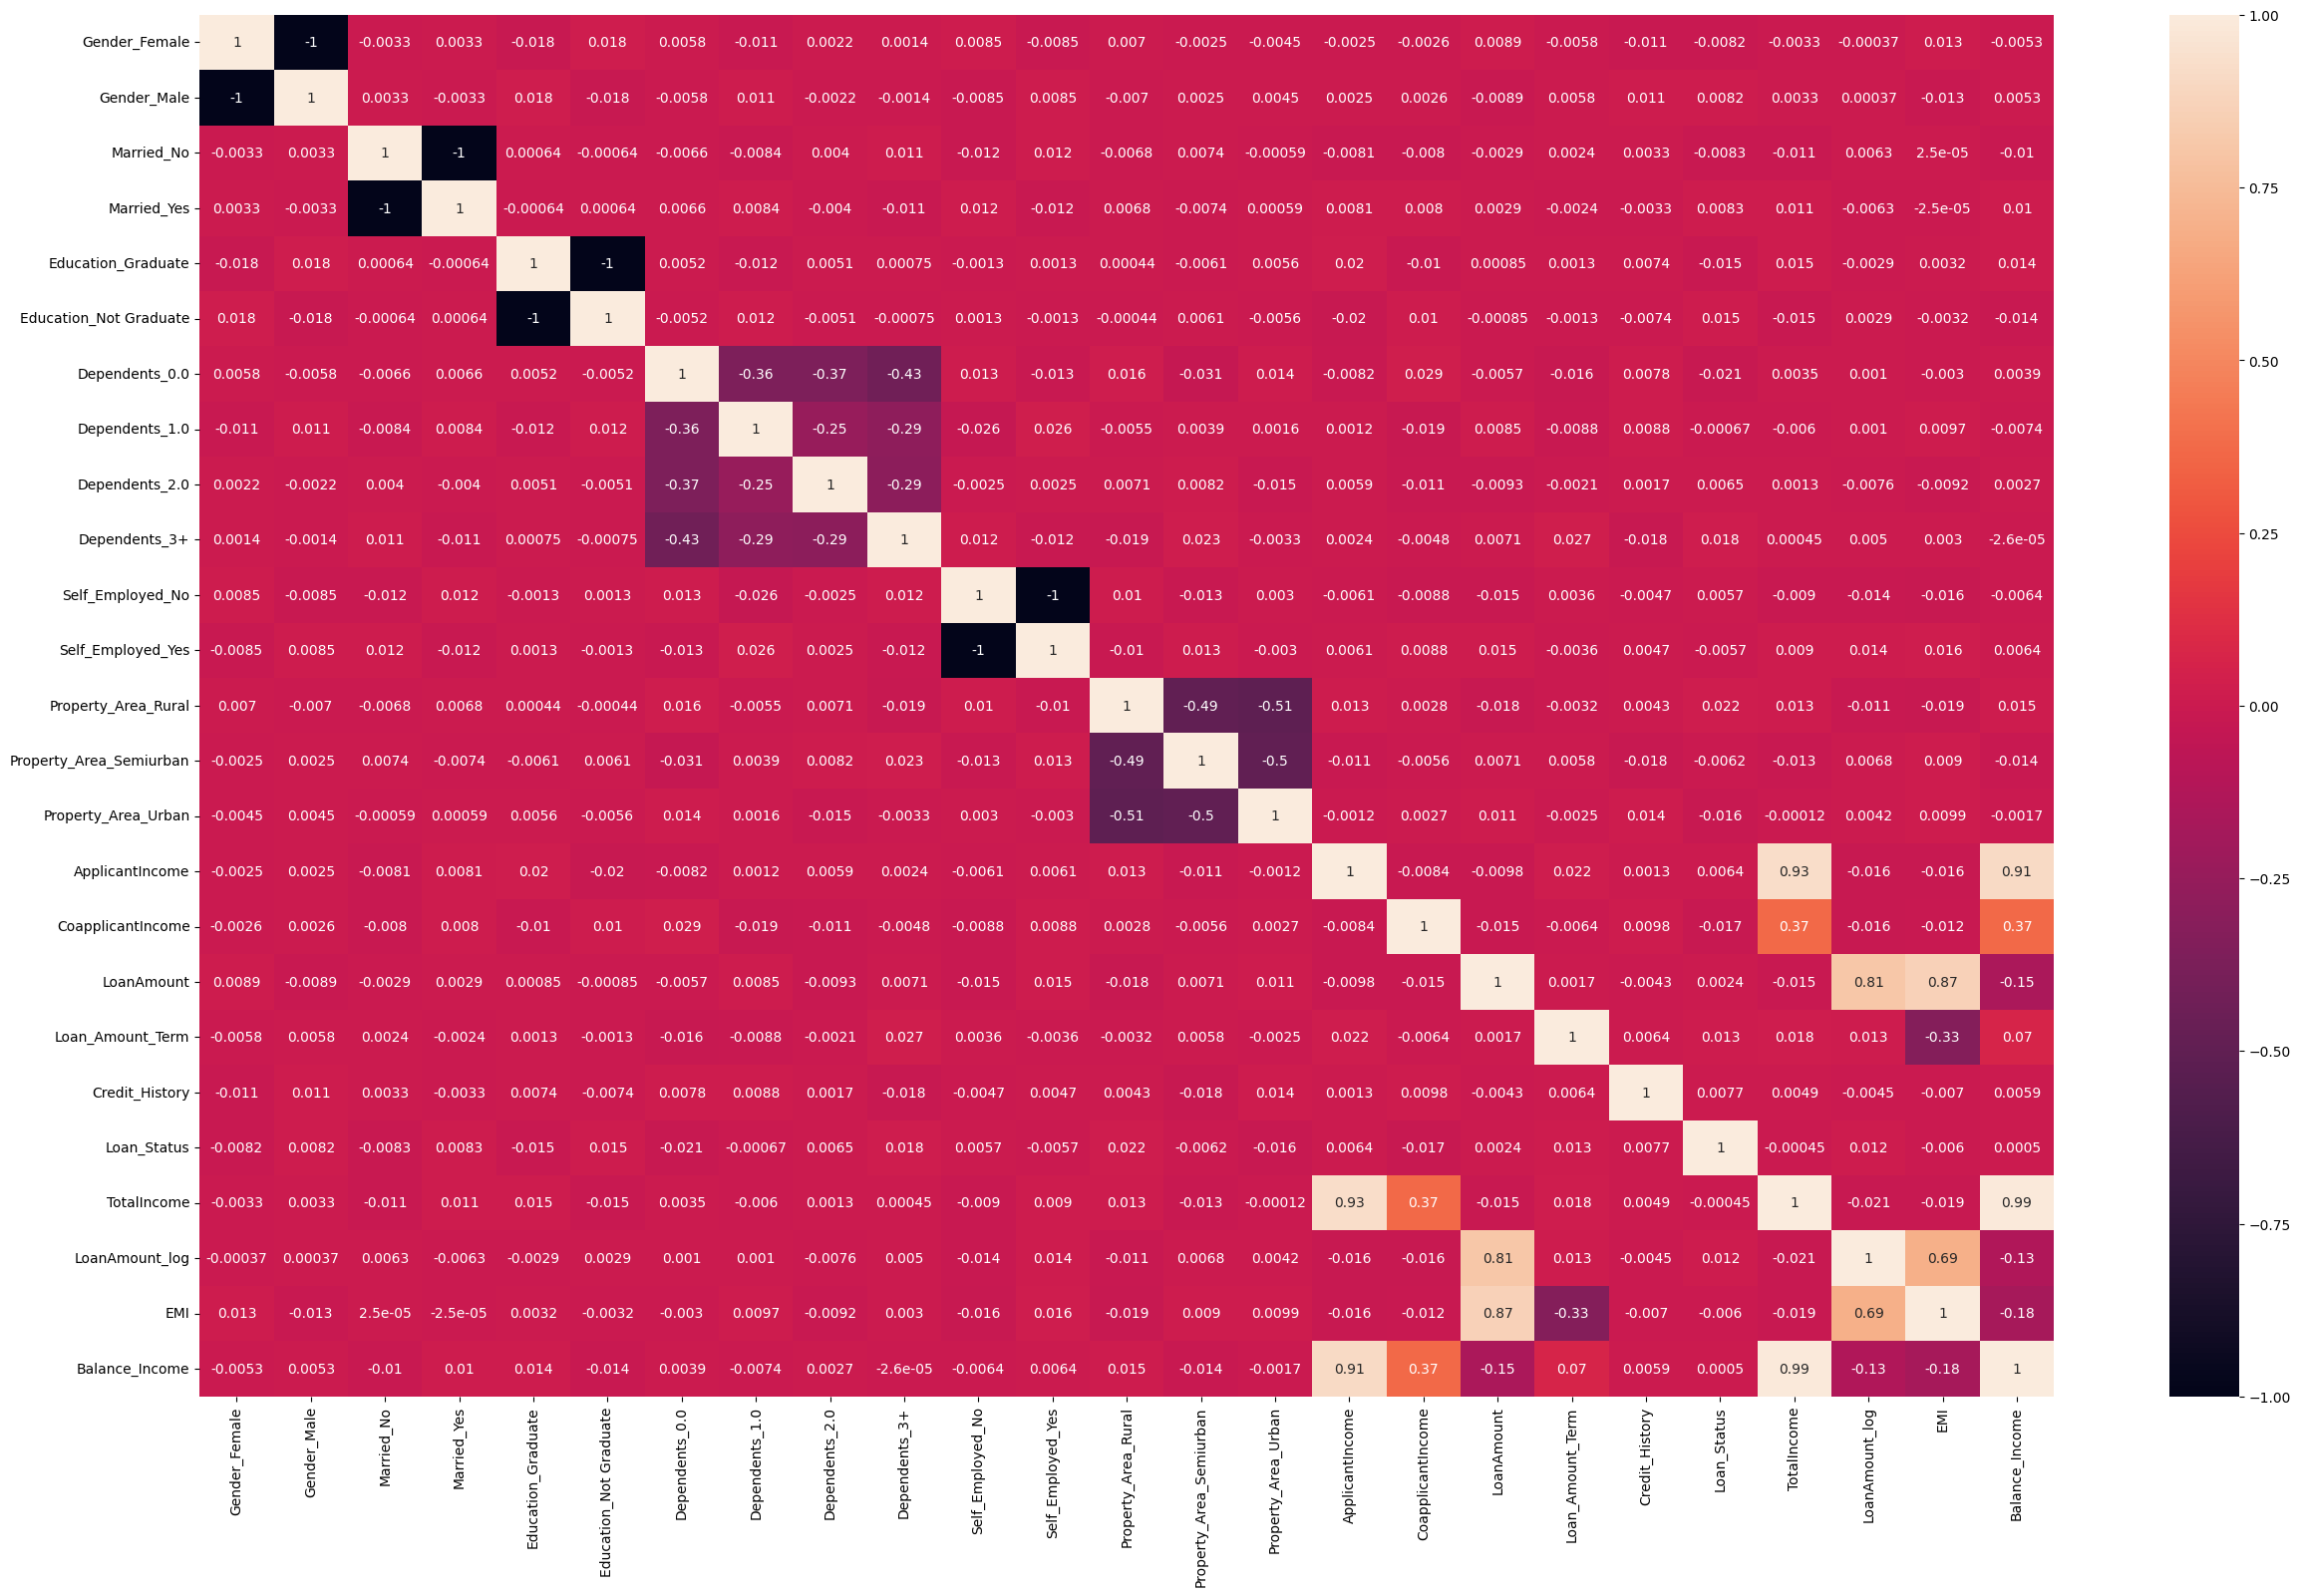

In [86]:
plt.figure(figsize=(30,18))
sns.heatmap(loan_data_encoded_.corr(),annot=True)

## Variance inflation Factor

In [87]:
!pip install statsmodels

Access is denied.


In [88]:
# Create a DataFrame to store VIF results
import statsmodels.api as sm

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [sm.OLS(df[col], df.drop(col, axis=1)).fit().rsquared for col in df.columns]
    return vif_data

vif_result = calculate_vif(loan_data_encoded_)
vif_result

,Variable,VIF
0,Gender_Female,1.000000
1,Gender_Male,1.000000
2,Married_No,1.000000
3,Married_Yes,1.000000
4,Education_Graduate,1.000000
5,Education_Not Graduate,1.000000
6,Dependents_0.0,1.000000
7,Dependents_1.0,1.000000
8,Dependents_2.0,1.000000
9,Dependents_3+,1.000000


All VIF are less than 5 hence we can say that there is no muticolinearity in data

In [89]:
loan_data_encoded_.shape

(8990, 25)

## Splitting data into independent and dependent features

In [90]:
# Step 1: Define X and y
X = loan_data_encoded_.drop(columns=['Loan_Status'])
y = loan_data_encoded_['Loan_Status']

In [91]:
# Step 2: Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [92]:
print(loan_data_encoded_.columns)

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Dependents_0.0',
       'Dependents_1.0', 'Dependents_2.0', 'Dependents_3+', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome', 'LoanAmount_log', 'EMI', 'Balance_Income'],
      dtype='object')


In [93]:
loan_data_encoded_.dtypes

Gender_Female              float64
Gender_Male                float64
Married_No                 float64
Married_Yes                float64
Education_Graduate         float64
Education_Not Graduate     float64
Dependents_0.0             float64
Dependents_1.0             float64
Dependents_2.0             float64
Dependents_3+              float64
Self_Employed_No           float64
Self_Employed_Yes          float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
LoanAmount_log             float64
EMI                        float64
Balance_Income             float64
dtype: object

In [94]:
print(loan_data_cleaned.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanAmount_log', 'EMI', 'Balance_Income'],
      dtype='object')


In [95]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [96]:
#Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Random Forest

In [97]:
# Step 10: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
print(X.shape, y.shape)
print(y.value_counts())

(8990, 24) (8990,)
Loan_Status
1    6193
0    2797
Name: count, dtype: int64


In [99]:
print("Train class distribution:")
print(y_train.value_counts())

Train class distribution:
Loan_Status
1    4954
0    2238
Name: count, dtype: int64


In [100]:
#Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.06      0.10       559
           1       0.69      0.95      0.80      1239

    accuracy                           0.67      1798
   macro avg       0.52      0.50      0.45      1798
weighted avg       0.59      0.67      0.58      1798

Confusion Matrix:
 [[  32  527]
 [  59 1180]]
ROC AUC Score: 0.4886464212439774


## Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [102]:
scorer = make_scorer(f1_score)

In [103]:
scores = cross_val_score(model, X, y, cv=5, scoring=scorer)

In [104]:
print("F1 scores in each fold:", scores)
print("Average F1 score:", np.mean(scores))

F1 scores in each fold: [0.79701796 0.79263302 0.8        0.79278666 0.79700272]
Average F1 score: 0.7958880723891986


In [106]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print("\nTop Features:\n", feature_importances.sort_values(ascending=False).head(10))


Top Features:
 CoapplicantIncome    0.119682
ApplicantIncome      0.115479
TotalIncome          0.113807
Balance_Income       0.113741
LoanAmount           0.112759
LoanAmount_log       0.111875
EMI                  0.111546
Loan_Amount_Term     0.022843
Dependents_0.0       0.013103
Credit_History       0.013019
dtype: float64


## Conclusions

The Random Forest classifier achieved an average F1-score of ~0.796 across 5-fold cross-validation, indicating a strong balance between precision and recall despite class imbalance. While initial accuracy was around 67%, the cross-validated F1 score highlighted robust generalization.

##### CoapplicantIncome & ApplicantIncome	Strongly influence loan approval	
Higher incomes generally indicate better repayment ability. These features were the top two in importance scores.

##### EMI (Equated Monthly Installment) and Balance Income significantly impacted approval: 
Lower EMI and higher disposable income post EMI payment indicated better approval chances.

##### Features like Self_Employed and Dependents had less predictive powe:
It suggest that employment type or number of dependents did not strongly influence the outcome. how do we see these two points

## Other additional models

## Logistic 

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
# Initialize logistic regression with class_weight to handle imbalance
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [109]:
# Fit the model
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [110]:
# Predict
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [111]:
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[294 265]
 [632 607]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.53      0.40       559
           1       0.70      0.49      0.58      1239

    accuracy                           0.50      1798
   macro avg       0.51      0.51      0.49      1798
weighted avg       0.58      0.50      0.52      1798


ROC AUC Score: 0.5044708280813918


In [112]:
scores = cross_val_score(log_reg, X, y, cv=5, scoring=scorer)

print("F1 scores in each fold:", scores)
print("Average F1 score:", np.mean(scores))

F1 scores in each fold: [0.6137806  0.59447005 0.60292772 0.5929368  0.58692629]
Average F1 score: 0.5982082911600954


## XGBoost

In [113]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [114]:
import xgboost as xgb

In [115]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # imbalance handling
    random_state=42
)

In [116]:
# Fit the model
xgb_clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [117]:
# Predict
y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:, 1]

In [118]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[183 376]
 [437 802]]

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.33      0.31       559
           1       0.68      0.65      0.66      1239

    accuracy                           0.55      1798
   macro avg       0.49      0.49      0.49      1798
weighted avg       0.56      0.55      0.55      1798


ROC AUC Score: 0.49304577960470747


In [119]:
scores = cross_val_score(xgb_clf, X, y, cv=5, scoring=scorer)

print("F1 scores in each fold:", scores)
print("Average F1 score:", np.mean(scores))

F1 scores in each fold: [0.67717842 0.67272727 0.67198656 0.66336225 0.66443234]
Average F1 score: 0.6699373690179297


## Thank You